## REGRESION LOGISTICA-TITANIC

### Jose Vicente Ordoñez Palacios

1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc. 
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario. 
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características. 
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo. 
5. Entrenar el modelo configurando los diferentes
hiperparámetros. 
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc. 
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo. 
8. Interpretar, analizar y documentdos los resultaps://github.com/ 

## 1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc..

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Cargar el dataset
data = pd.read_csv("Titanic-Dataset.csv")


In [9]:
# Vista general del dataset
print(data.head())
print(data.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [11]:
# Verificar valores faltantes
print(data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


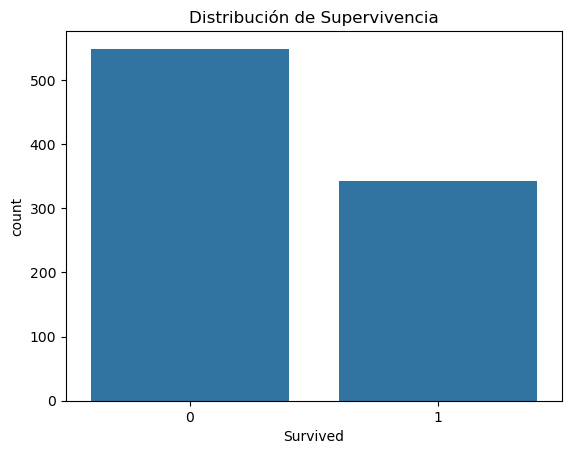

In [13]:
# Análisis de supervivencia
sns.countplot(data=data, x="Survived")
plt.title("Distribución de Supervivencia")
plt.show()


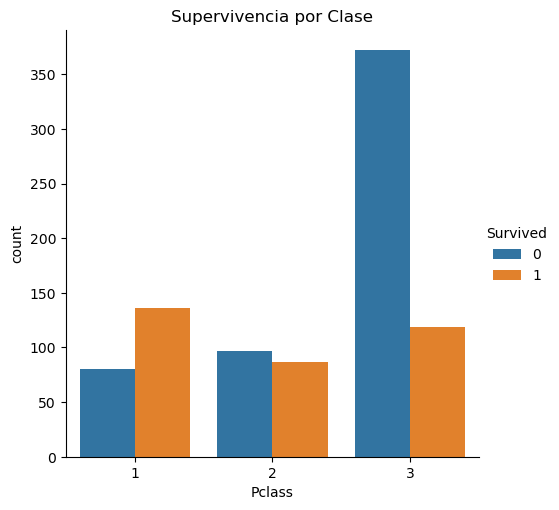

In [15]:
# Relación entre supervivencia y clase
sns.catplot(data=data, x="Pclass", hue="Survived", kind="count")
plt.title("Supervivencia por Clase")
plt.show()


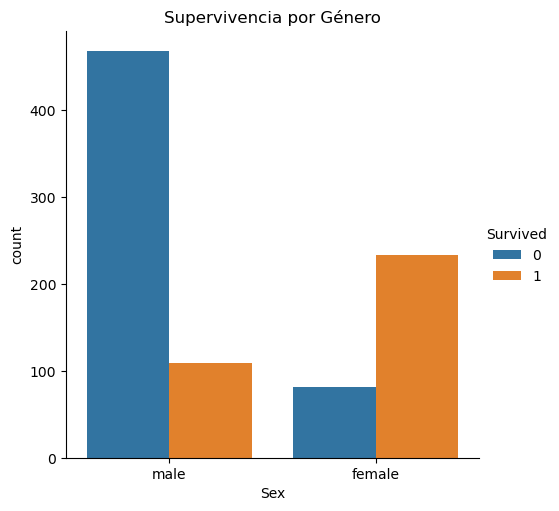

In [17]:
# Relación entre género y supervivencia
sns.catplot(data=data, x="Sex", hue="Survived", kind="count")
plt.title("Supervivencia por Género")
plt.show()


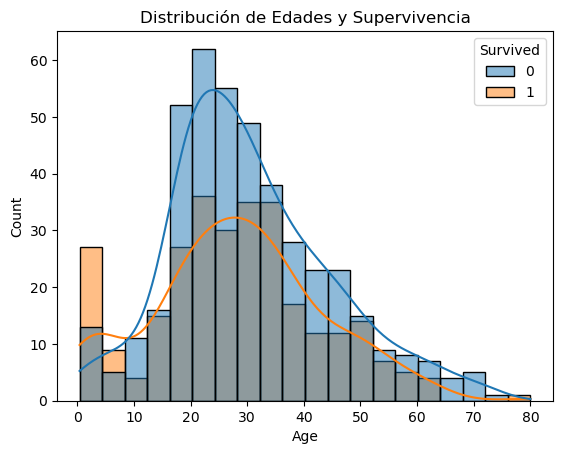

In [19]:
# Distribución de edades y supervivencia
sns.histplot(data=data, x="Age", hue="Survived", kde=True)
plt.title("Distribución de Edades y Supervivencia")
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [21]:
# Manejo de valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)  # Edad con la mediana
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Embarque con el valor más frecuente


C:\Users\JOSE\AppData\Local\Temp\ipykernel_2328\276111399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Edad con la mediana
C:\Users\JOSE\AppData\Local\Temp\ipykernel_2328\276111399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [23]:
# Eliminación de columnas no relevantes
data.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)


In [25]:
# Codificación de variables categóricas
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)


In [27]:
# Verificar los datos preprocesados
print(data.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

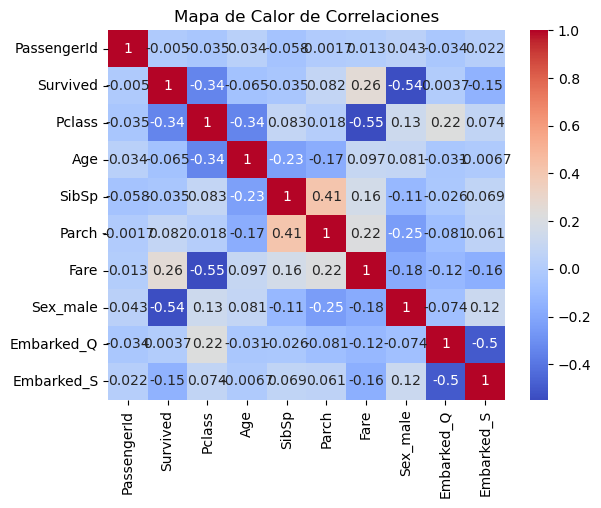

In [32]:
# Visualizar la correlación de las características
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


In [34]:
# Seleccionar características relevantes
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [37]:
from sklearn.model_selection import train_test_split

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [40]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression(max_iter=1000, random_state=42)


In [42]:
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
y_pred = model.predict(X_test)


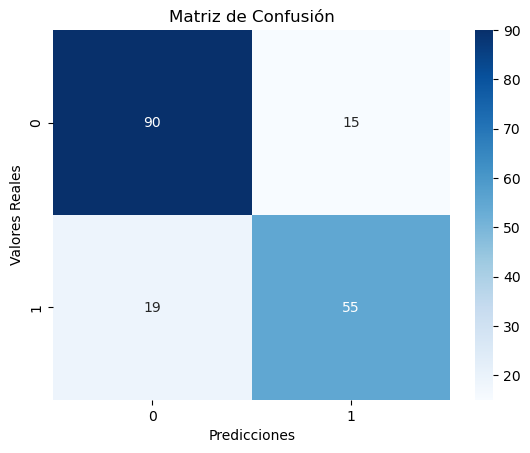

In [96]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

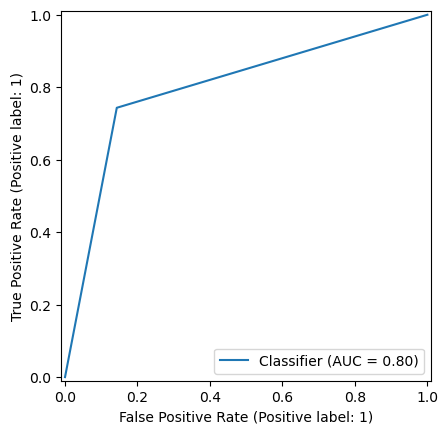

In [102]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [104]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [106]:
# Importancia de características
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)


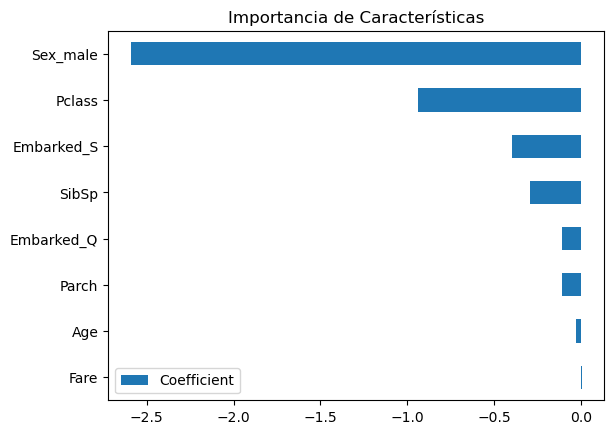

In [114]:
# Gráfico de barras
coefficients.plot(kind='barh', title='Importancia de Características')
plt.show()

## 8.Interpretar, analizar y documentar los resultados

Precisión (Precision):
La precisión mide la proporción de predicciones positivas correctas entre todas las predicciones positivas realizadas por el modelo. Aquí, la precisión para la clase "Survived" (sobrevivió) es 0.79, lo que significa que el 79% de las personas predichas como sobrevivientes por el modelo realmente sobrevivieron.


Recall (Sensibilidad o Tasa de Verdaderos Positivos):
El recall mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí, el recall para la clase "Survived" es 0.74, lo que indica que el modelo identificó correctamente al 74% de todos los sobrevivientes reales.


F1-Score:
El F1-score es la media armónica entre precisión y recall. Proporciona una única métrica equilibrada que combina ambas métricas. Aquí, el F1-score para la clase "Survived" es 0.76, lo que indica un buen equilibrio entre precisión y recall en el modelo.

Interpretación de la Matriz de Confusión:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 90

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 55

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 15

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 19

Interpretación de la Curva ROC y AUC: El Área bajo la curva (AUC) es 0.80, lo que significa que el 80% de las predicciones del modelo son correctas a través de diferentes umbrales de clasificación. Este valor sugiere que el modelo tiene un buen desempeño para distinguir entre pasajeros que sobrevivieron y los que no.